In [152]:
!pip install pmdarima

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from datetime import datetime
import statsmodels.api as sm
import statsmodels.graphics.tsaplots import plot acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
#from statsmodels.api import qqplot, add_constant
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import r2_score
#from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


from sklearn.decomposition import PCA
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from pmdarima import auto_arima

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc("font",family = "NanumBarunGothic")
# 음수 표시
matplotlib.rc("axes",unicode_minus=False)

SyntaxError: invalid syntax (3180759556.py, line 11)

In [ ]:
!pip install pmdarima

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

In [2]:
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
    
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred/y_true))*100)

In [3]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/체질검사.csv",encoding='euc-kr')
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER
0,35.2,46,363.15 lb,72.25 inch,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,남성
1,11.8,27,168 lb,71.25 inch,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,남성
2,22.2,69,177.75 lb,68.5 inch,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,남성
3,10.6,57,147.75 lb,65.75 inch,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,여성
4,47.5,51,219 lb,64 inch,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,여성


In [4]:
df_raw[['WEIGHT','WEIGHT_UNIT']]=df_raw['WEIGHT'].str.split(expand=True)
df_raw[['HEIGHT','HEIGHT_UNIT']]=df_raw['HEIGHT'].str.split(expand=True)
df_raw['WEIGHT']=df_raw['WEIGHT'].astype('float64')
df_raw['HEIGHT']=df_raw['HEIGHT'].astype('float64')
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FAT          252 non-null    float64
 1   AGE          252 non-null    int64  
 2   WEIGHT       252 non-null    float64
 3   HEIGHT       252 non-null    float64
 4   NECK         252 non-null    float64
 5   CHEST        252 non-null    float64
 6   ABDOMEN      252 non-null    float64
 7   HIP          252 non-null    float64
 8   THIGH        252 non-null    float64
 9   KNEE         252 non-null    float64
 10  ANKLE        252 non-null    float64
 11  BICEPS       252 non-null    float64
 12  FOREARM      252 non-null    float64
 13  WRIST        252 non-null    float64
 14  GENDER       252 non-null    object 
 15  WEIGHT_UNIT  252 non-null    object 
 16  HEIGHT_UNIT  252 non-null    object 
dtypes: float64(13), int64(1), object(3)
memory usage: 33.6+ KB


In [5]:
df_raw=df_raw.drop(['WEIGHT_UNIT','HEIGHT_UNIT'],axis=1)
df_raw_dummy = pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST,GENDER_여성
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4,0
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8,0
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8,0
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9,1
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4,1


In [6]:
df_raw_y=df_raw_dummy["FAT"]
df_raw_x=df_raw_dummy.drop("FAT",axis=1,inplace=False)
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3, random_state = 100)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=100)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(176, 14)
train data Y size:(176,)
test data X size:(76, 14)
test data Y size:(76,)


In [7]:
# 회귀모델
lr_model=smf.ols(formula="FAT~HEIGHT+NECK+ABDOMEN+HIP+FOREARM",data=df_train)
lr_result=lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     103.5
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.01e-49
Time:                        09:53:43   Log-Likelihood:                -502.97
No. Observations:                 176   AIC:                             1018.
Df Residuals:                     170   BIC:                             1037.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7526      7.542      0.100      0.9

In [8]:
# Decision Tree
dt_model=DecisionTreeRegressor(random_state=100,min_samples_leaf=8,min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=100)

In [9]:
# Random Forest
rf_model=RandomForestRegressor(random_state=200,n_estimators=100,min_samples_leaf=6,
                              min_samples_split=14,max_depth=4)
rf_model.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=200)

In [10]:
# Gradient Boosting
gb_model=GradientBoostingRegressor(random_state=100,n_estimators=30,min_samples_leaf=11,
                              min_samples_split=22,max_depth=4,learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=100)

In [11]:
models=['회귀분석','의사결정나무','랜덤 포레스트','그래디언트 부스팅']
mse,rmse,mae,mape=[],[],[],[]

In [12]:
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['FAT'],lr_y_pred))
rmse.append(root_mean_squared_error(df_test['FAT'],lr_y_pred))
mae.append(mean_absolute_error(df_test['FAT'],lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['FAT'],lr_y_pred))

In [14]:
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [15]:
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [16]:
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

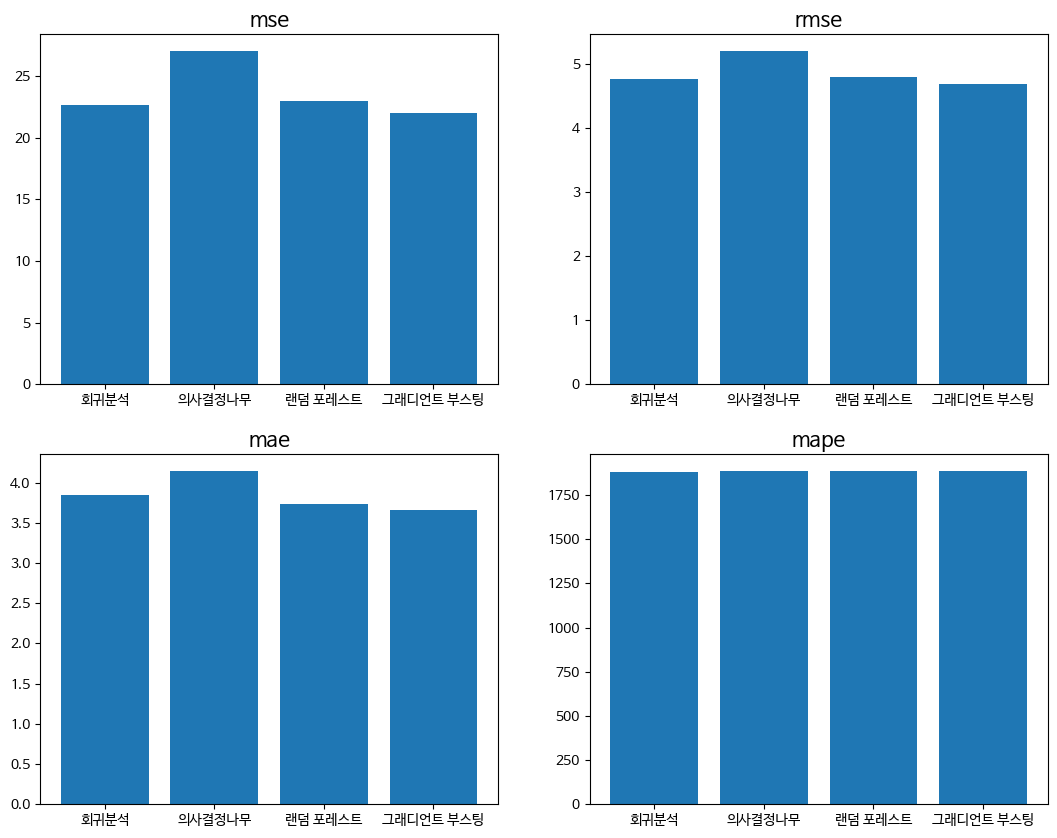

In [17]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

##### 실습

In [18]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/DIABETES.csv",encoding='euc-kr')
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [19]:
df_raw['GENDER']=df_raw['GENDER'].replace(2,0)
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,0,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,0,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [21]:
df_raw_dummy = pd.get_dummies(df_raw,drop_first=True)
df_raw_dummy.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,0,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,0,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [22]:
df_raw_y=df_raw_dummy["Y"]
df_raw_x=df_raw_dummy.drop("Y",axis=1,inplace=False)
df_train,df_test=train_test_split(df_raw_dummy, test_size=0.3, random_state = 100)

df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_raw_x,df_raw_y,test_size=0.3,random_state=100)

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))
print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

train data X size:(309, 10)
train data Y size:(309,)
test data X size:(133, 10)
test data Y size:(133,)


In [23]:
# 회귀모델
lr_model=smf.ols(formula="Y~LDL+GENDER+BP+BMI+GLUCOSE+HDL+LTG" ,data=df_train)
lr_result=lr_model.fit()
print(lr_result.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     45.04
Date:                Wed, 17 May 2023   Prob (F-statistic):           2.40e-43
Time:                        10:29:59   Log-Likelihood:                -1675.8
No. Observations:                 309   AIC:                             3368.
Df Residuals:                     301   BIC:                             3398.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -293.4986     43.537     -6.741      0.0

In [24]:
# Decision Tree
dt_model=DecisionTreeRegressor(random_state=100,min_samples_leaf=8,min_samples_split=20,max_depth=4)
dt_model.fit(df_train_x,df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=100)

In [25]:
# Random Forest
rf_model=RandomForestRegressor(random_state=200,n_estimators=100,min_samples_leaf=6,
                              min_samples_split=14,max_depth=4)
rf_model.fit(df_train_x,df_train_y)

RandomForestRegressor(max_depth=4, min_samples_leaf=6, min_samples_split=14,
                      random_state=200)

In [26]:
# Gradient Boosting
gb_model=GradientBoostingRegressor(random_state=100,n_estimators=30,min_samples_leaf=11,
                              min_samples_split=22,max_depth=4,learning_rate=0.1)
gb_model.fit(df_train_x,df_train_y)

GradientBoostingRegressor(max_depth=4, min_samples_leaf=11,
                          min_samples_split=22, n_estimators=30,
                          random_state=100)

In [27]:
models=['회귀분석','의사결정나무','랜덤 포레스트','그래디언트 부스팅']
mse,rmse,mae,mape=[],[],[],[]

In [30]:
# 예측
lr_y_pred = lr_result.predict(df_test)

# 평가
mse.append(mean_squared_error(df_test['Y'],lr_y_pred))
rmse.append(root_mean_squared_error(df_test['Y'],lr_y_pred))
mae.append(mean_absolute_error(df_test['Y'],lr_y_pred))
mape.append(mean_absolute_percentage_error(df_test['Y'],lr_y_pred))

In [31]:
# 예측
dt_y_pred = dt_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,dt_y_pred))
rmse.append(root_mean_squared_error(df_test_y,dt_y_pred))
mae.append(mean_absolute_error(df_test_y,dt_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,dt_y_pred))

In [32]:
# 예측
rf_y_pred = rf_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,rf_y_pred))
rmse.append(root_mean_squared_error(df_test_y,rf_y_pred))
mae.append(mean_absolute_error(df_test_y,rf_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,rf_y_pred))

In [33]:
# 예측
gb_y_pred = gb_model.predict(df_test_x)

# 평가
mse.append(mean_squared_error(df_test_y,gb_y_pred))
rmse.append(root_mean_squared_error(df_test_y,gb_y_pred))
mae.append(mean_absolute_error(df_test_y,gb_y_pred))
mape.append(mean_absolute_percentage_error(df_test_y,gb_y_pred))

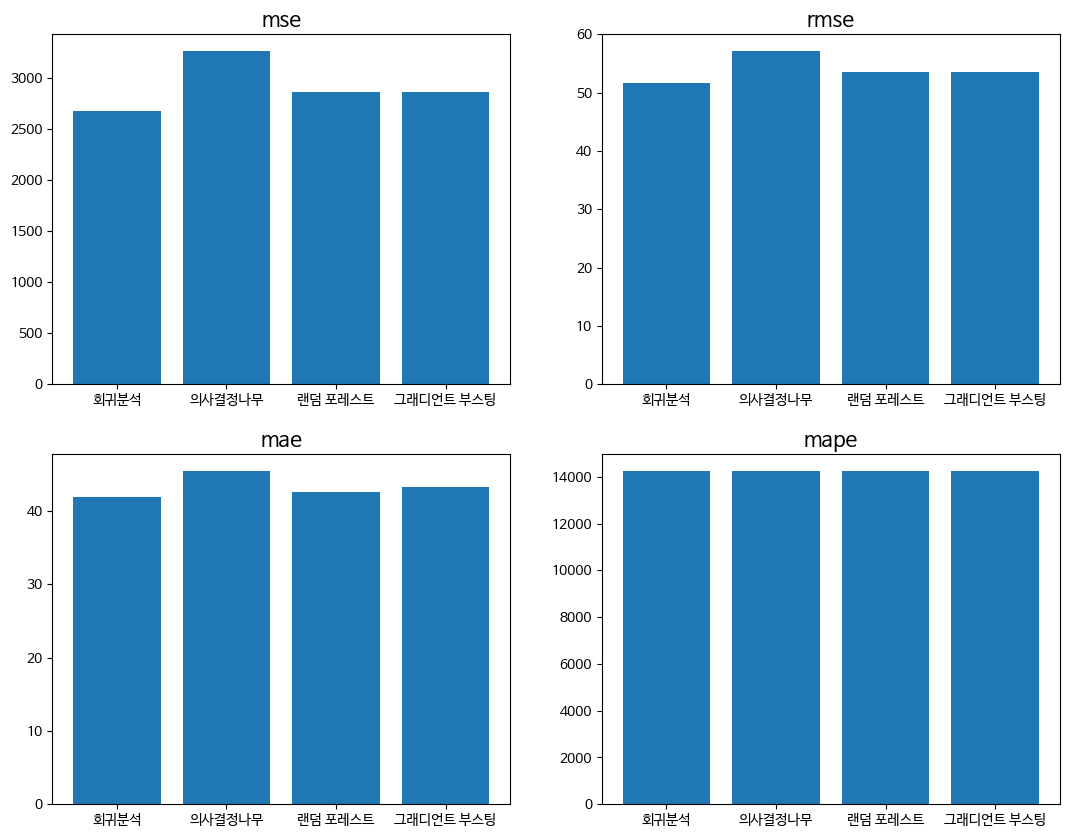

In [34]:
fig,ax=plt.subplots(2,2,figsize=(13,10))
ax[0,0].bar(models,mse)
ax[0,0].set_title("mse").set_fontsize(15)

ax[0,1].bar(models,rmse)
ax[0,1].set_title("rmse").set_fontsize(15)

ax[1,0].bar(models,mae)
ax[1,0].set_title("mae").set_fontsize(15)

ax[1,1].bar(models,mape)
ax[1,1].set_title("mape").set_fontsize(15)

##### 주성분 분석

In [77]:
df_raw=pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/직무능력평가.csv")
df_raw.head()

,EVAL,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,43,51,30,39,61,92,45
1,63,64,51,54,63,73,47
2,71,70,68,69,76,86,48
3,61,63,45,47,54,84,35
4,81,78,56,66,71,83,47


In [78]:
df_raw_x=df_raw.drop("EVAL",axis=1)
df_raw_y=df_raw["EVAL"]
df_raw_y.head()
df_raw_x.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,51,30,39,61,92,45
1,64,51,54,63,73,47
2,70,68,69,76,86,48
3,63,45,47,54,84,35
4,78,56,66,71,83,47


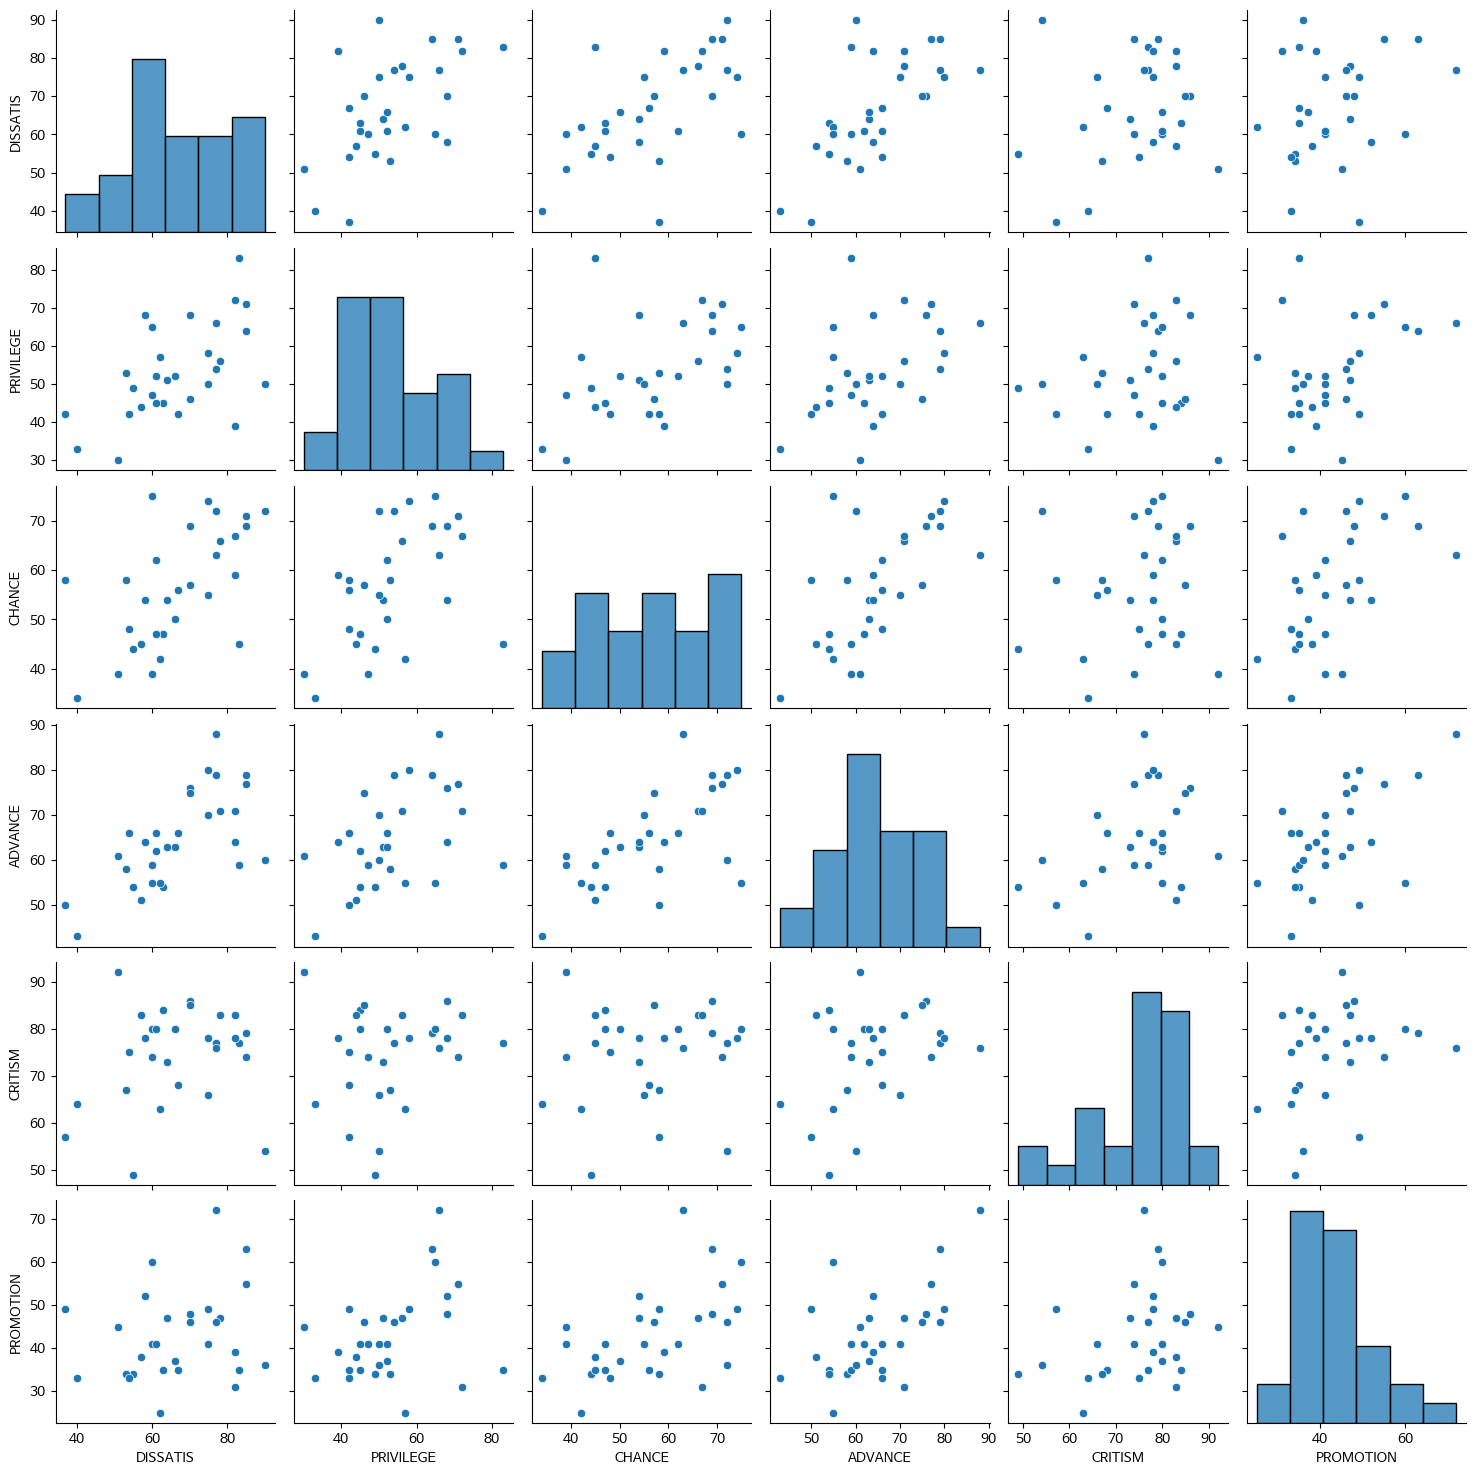

In [40]:
sns.pairplot(df_raw_x)

In [41]:
df_raw_x.corr().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
DISSATIS,1.000,0.558,0.597,0.669,0.188,0.225
PRIVILEGE,0.558,1.000,0.493,0.445,0.147,0.343
CHANCE,0.597,0.493,1.000,0.640,0.116,0.532
ADVANCE,0.669,0.445,0.640,1.000,0.377,0.574
CRITISM,0.188,0.147,0.116,0.377,1.000,0.283
PROMOTION,0.225,0.343,0.532,0.574,0.283,1.000


In [42]:
df_raw_x.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,66.600,53.133,56.367,64.633,74.767,42.933
std,13.315,12.235,11.737,10.397,9.895,10.289
min,37.000,30.000,34.000,43.000,49.000,25.000
25%,58.500,45.000,47.000,58.250,69.250,35.000
50%,65.000,51.500,56.500,63.500,77.500,41.000
75%,77.000,62.500,66.750,71.000,80.000,47.750
max,90.000,83.000,75.000,88.000,92.000,72.000


In [49]:
x_cols=df_raw_x.columns

scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

print("Scaled Data:\n", format(nd_scaled[:5].round(3)))
print("Shape:\n {}", format(nd_scaled.shape))

Scaled Data:
 [[-1.192 -1.923 -1.505 -0.355  1.771  0.204]
 [-0.199 -0.177 -0.205 -0.16  -0.182  0.402]
 [ 0.26   1.236  1.095  1.112  1.155  0.501]
 [-0.275 -0.676 -0.812 -1.04   0.949 -0.784]
 [ 0.871  0.238  0.835  0.623  0.846  0.402]]
Shape:
 {} (30, 6)


In [56]:
df_scaled=pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
0,-1.192,-1.923,-1.505,-0.355,1.771,0.204
1,-0.199,-0.177,-0.205,-0.160,-0.182,0.402
2,0.260,1.236,1.095,1.112,1.155,0.501
3,-0.275,-0.676,-0.812,-1.040,0.949,-0.784
4,0.871,0.238,0.835,0.623,0.846,0.402


In [57]:
df_scaled.describe().round(3)

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION
count,30.000,30.000,30.000,30.000,30.000,30.000
mean,0.000,0.000,-0.000,-0.000,0.000,0.000
std,1.017,1.017,1.017,1.017,1.017,1.017
min,-2.261,-1.923,-1.938,-2.116,-2.649,-1.773
25%,-0.619,-0.676,-0.812,-0.624,-0.567,-0.784
50%,-0.122,-0.136,0.012,-0.111,0.281,-0.191
75%,0.794,0.779,0.900,0.623,0.538,0.476
max,1.787,2.483,1.615,2.286,1.771,2.873


In [59]:
pca=PCA(n_components=6)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[ 1.67606983 -2.73856419 -0.12843595 -0.50321261  0.24330658  0.22576117]
 [ 0.21834397 -0.12615302  0.43115839  0.08726221  0.19566103  0.1941439 ]
 [-2.10515127 -0.51500683 -0.27683087  0.49131136 -0.44691698 -0.63174369]
 [ 1.35994032 -0.86064574 -0.91799066  0.03173793 -0.40137177  0.44095403]
 [-1.5120347  -0.35277019 -0.32684445 -0.32877858 -0.32709718  0.21246099]]
Shape:
 (30, 6)


In [60]:
df_pca=pd.DataFrame(nd_pca,columns=["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])

df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,DISSATIS,PRIVILEGE,CHANCE,ADVANCE,CRITISM,PROMOTION,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,-1.191662,-1.923006,-1.504945,-0.355426,1.771410,0.204301,1.676070,-2.738564,-0.128436,-0.503213,0.243307,0.225761
1,-0.198610,-0.177338,-0.205088,-0.159779,-0.181595,0.402012,0.218344,-0.126153,0.431158,0.087262,0.195661,0.194144
2,0.259721,1.235822,1.094768,1.111930,1.154672,0.500868,-2.105151,-0.515007,-0.276831,0.491311,-0.446917,-0.631744
3,-0.274999,-0.676100,-0.811688,-1.040192,0.949092,-0.784254,1.359940,-0.860646,-0.917991,0.031738,-0.401372,0.440954
4,0.870830,0.238298,0.834797,0.622811,0.846302,0.402012,-1.512035,-0.352770,-0.326844,-0.328779,-0.327097,0.212461


In [63]:
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,7)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,3.279,0.528,0.528
1,2,1.041,0.168,0.696
2,3,0.789,0.127,0.823
3,4,0.572,0.092,0.915
4,5,0.328,0.053,0.968
5,6,0.198,0.032,1.000


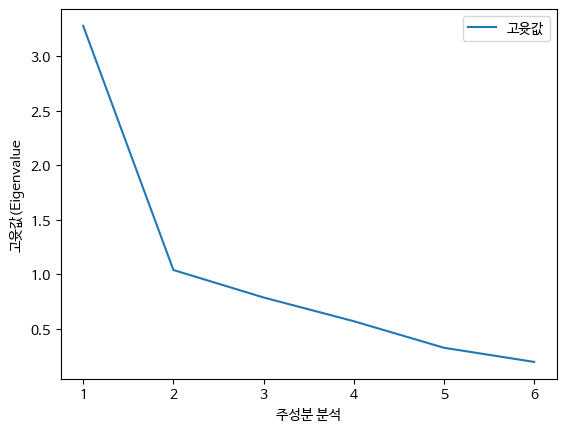

In [64]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label="고윳값")

plt.ylabel("고윳값(Eigenvalue")
plt.xlabel("주성분 분석")
plt.legend(loc="best")

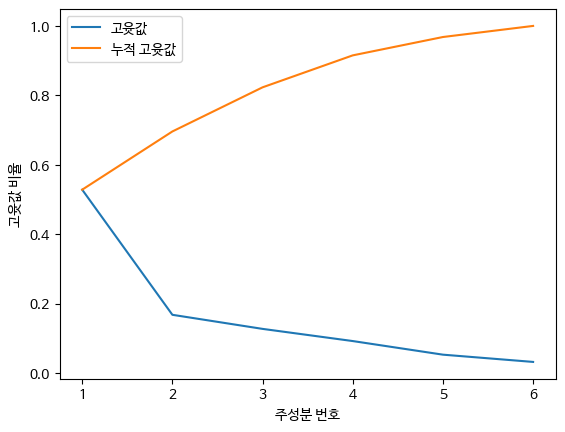

In [65]:
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["EigenValueRatio"],label="고윳값")

plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="누적 고윳값")
plt.ylabel("고윳값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [69]:
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,\
                    columns = ["Prin1","Prin2","Prin3","Prin4","Prin5","Prin6"])],axis=1)
df_eigenvector.round(3)         

,Feature,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
0,DISSATIS,0.439,-0.313,0.445,0.316,-0.192,-0.612
1,PRIVILEGE,0.395,-0.309,0.217,-0.815,-0.038,0.190
2,CHANCE,0.461,-0.217,-0.272,0.225,0.776,0.118
3,ADVANCE,0.493,0.116,0.006,0.365,-0.460,0.631
4,CRITISM,0.225,0.802,0.457,-0.100,0.289,-0.058
5,PROMOTION,0.381,0.321,-0.687,-0.206,-0.255,-0.416


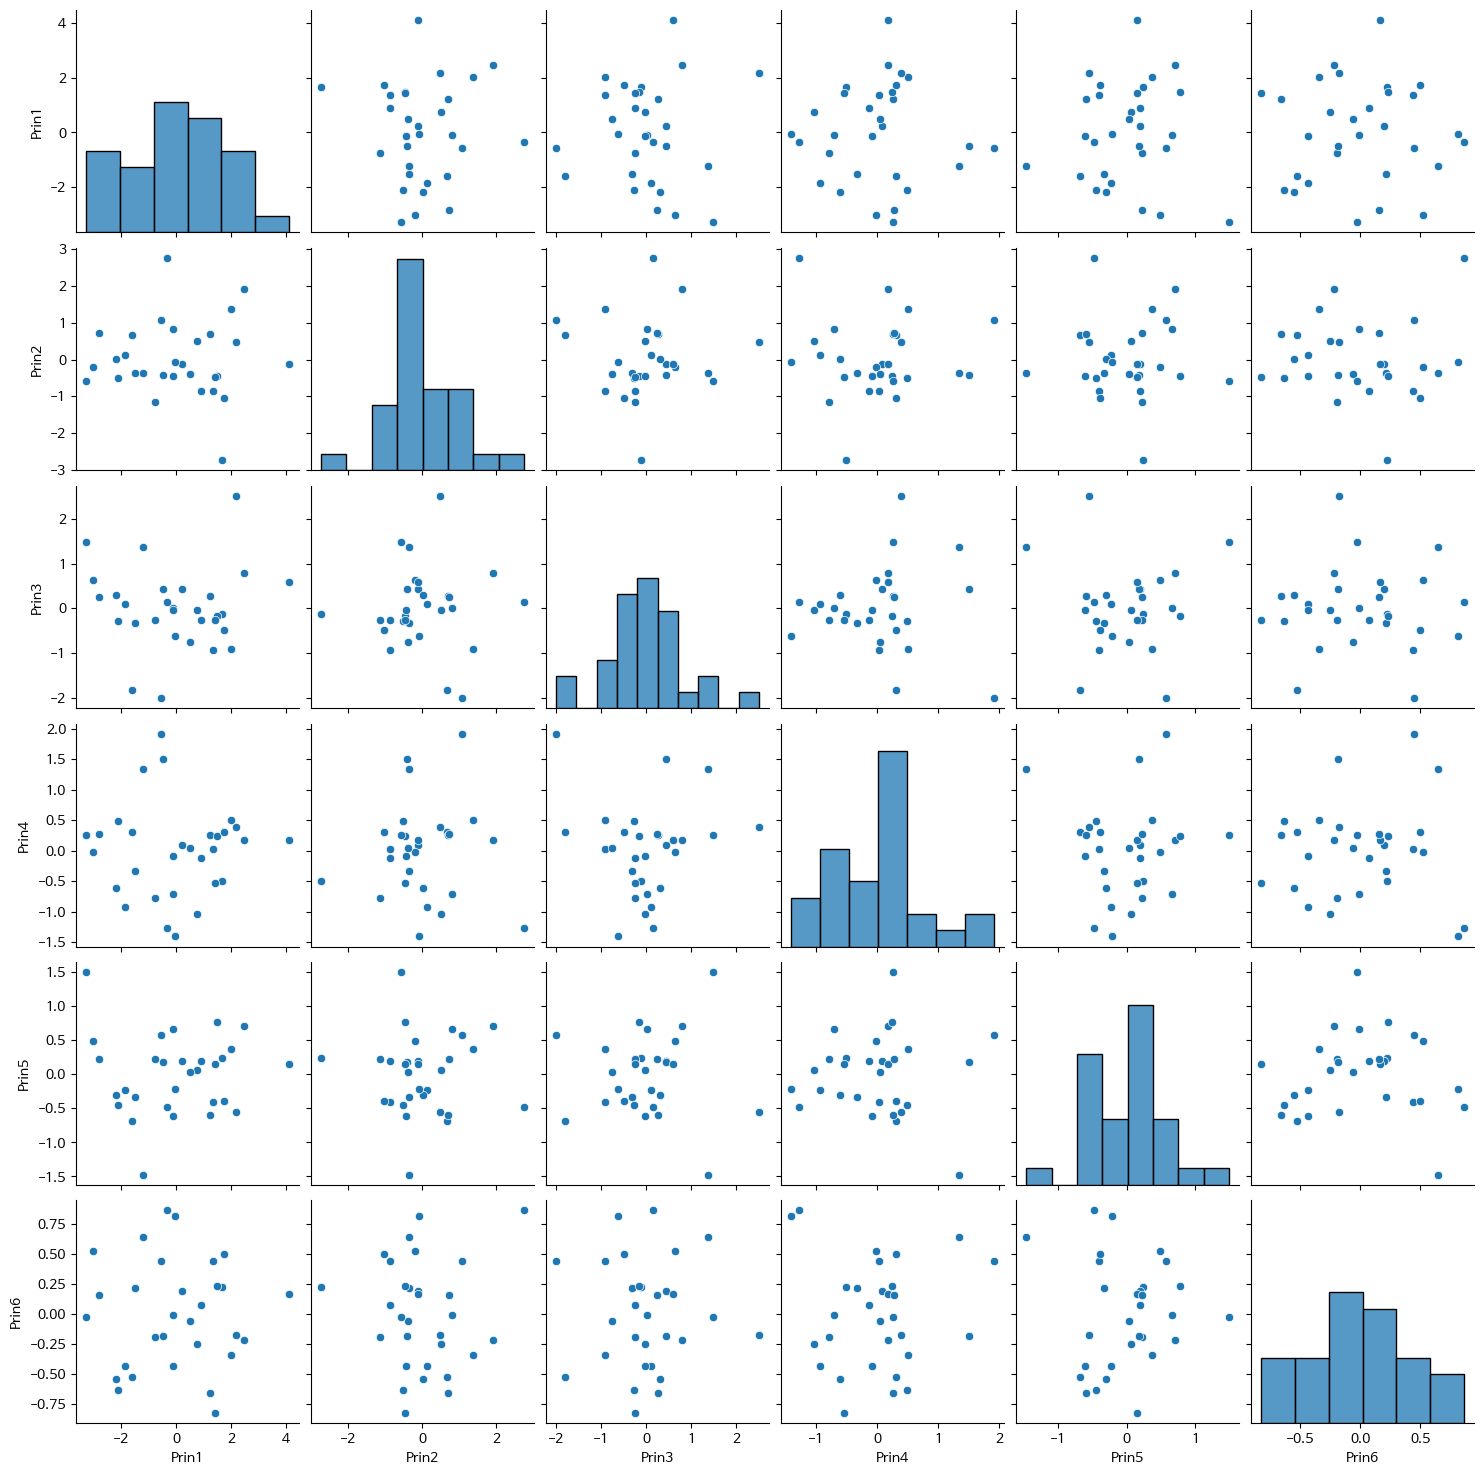

In [70]:
sns.pairplot(df_pca)

In [71]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4,Prin5,Prin6
Prin1,1.0,0.0,-0.0,-0.0,0.0,0.0
Prin2,0.0,1.0,0.0,-0.0,0.0,0.0
Prin3,-0.0,0.0,1.0,0.0,-0.0,-0.0
Prin4,-0.0,-0.0,0.0,1.0,0.0,-0.0
Prin5,0.0,0.0,-0.0,0.0,1.0,0.0
Prin6,0.0,0.0,-0.0,-0.0,0.0,1.0


In [72]:
df_raw_x_const=sm.add_constant(df_raw_x)
reg_model=sm.OLS(df_raw_y,df_raw_x_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     10.50
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.24e-05
Time:                        14:53:43   Log-Likelihood:                -97.250
No. Observations:                  30   AIC:                             208.5
Df Residuals:                      23   BIC:                             218.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7871     11.589      0.931      0.3

In [73]:
x_var=['Prin1','Prin2','Prin3']
df_pca_const=sm.add_constant(df_pca[x_var])
reg_model=sm.OLS(df_raw_y,df_pca_const)
reg_model=reg_model.fit()
print(reg_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   EVAL   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.580
Method:                 Least Squares   F-statistic:                     14.36
Date:                Wed, 17 May 2023   Prob (F-statistic):           1.02e-05
Time:                        14:55:53   Log-Likelihood:                -102.38
No. Observations:                  30   AIC:                             212.8
Df Residuals:                      26   BIC:                             218.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.6333      1.440     44.890      0.0

#### 실습

In [87]:
df_raw = pd.read_csv("/home/piai/22기 최예진/230510/2. Big Data 분석/IRIS.csv",encoding='euc-kr')
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [88]:
df_raw_x=df_raw.drop("SPECIES",axis=1)
df_raw_y=df_raw["SPECIES"]
df_raw_y.head()
df_raw_x.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


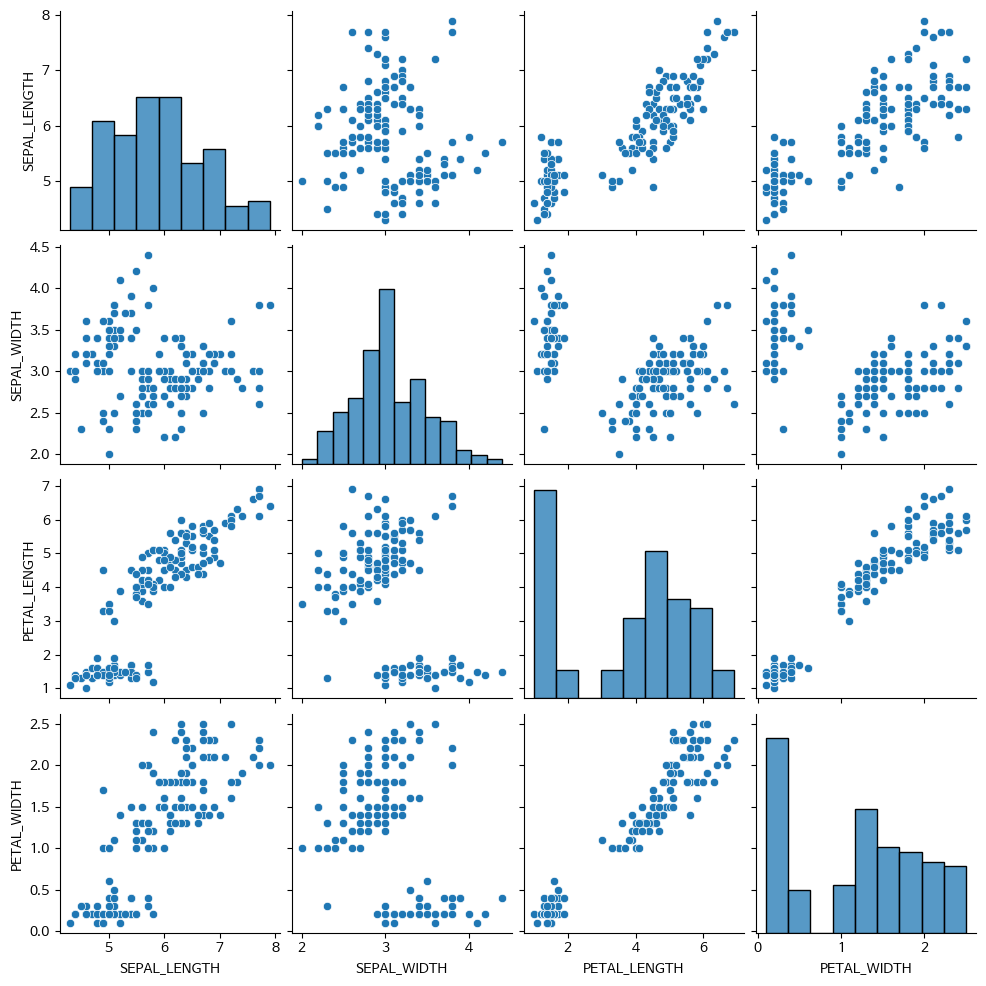

In [89]:
sns.pairplot(df_raw_x)

In [90]:
df_raw_x.corr().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
SEPAL_LENGTH,1.000,-0.118,0.872,0.818
SEPAL_WIDTH,-0.118,1.000,-0.428,-0.366
PETAL_LENGTH,0.872,-0.428,1.000,0.963
PETAL_WIDTH,0.818,-0.366,0.963,1.000


In [91]:
df_raw_x.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,5.843,3.057,3.758,1.199
std,0.828,0.436,1.765,0.762
min,4.300,2.000,1.000,0.100
25%,5.100,2.800,1.600,0.300
50%,5.800,3.000,4.350,1.300
75%,6.400,3.300,5.100,1.800
max,7.900,4.400,6.900,2.500


In [93]:
x_cols=df_raw_x.columns

scaler=StandardScaler()
nd_scaled=scaler.fit_transform(df_raw_x)

print("Scaled Data:\n", format(nd_scaled[:5].round(3)))
print("Shape:\n {}", format(nd_scaled.shape))

Scaled Data:
 [[-0.901  1.019 -1.34  -1.315]
 [-1.143 -0.132 -1.34  -1.315]
 [-1.385  0.328 -1.397 -1.315]
 [-1.507  0.098 -1.283 -1.315]
 [-1.022  1.249 -1.34  -1.315]]
Shape:
 {} (150, 4)


In [94]:
df_scaled=pd.DataFrame(nd_scaled,columns=x_cols)
df_scaled.head().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
0,-0.901,1.019,-1.340,-1.315
1,-1.143,-0.132,-1.340,-1.315
2,-1.385,0.328,-1.397,-1.315
3,-1.507,0.098,-1.283,-1.315
4,-1.022,1.249,-1.340,-1.315


In [95]:
df_scaled.describe().round(3)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH
count,150.000,150.000,150.000,150.000
mean,-0.000,-0.000,-0.000,-0.000
std,1.003,1.003,1.003,1.003
min,-1.870,-2.434,-1.568,-1.447
25%,-0.901,-0.592,-1.227,-1.184
50%,-0.053,-0.132,0.336,0.133
75%,0.675,0.559,0.763,0.791
max,2.492,3.091,1.786,1.712


In [98]:
pca=PCA(n_components=4)
nd_pca=pca.fit_transform(df_scaled)

print("PCA Data:\n {}".format(nd_pca[:5]))
print("Shape:\n {}".format(nd_pca.shape))

PCA Data:
 [[-2.26470281  0.4800266  -0.12770602 -0.0241682 ]
 [-2.08096115 -0.67413356 -0.23460885 -0.10300677]
 [-2.36422905 -0.34190802  0.04420148 -0.02837705]
 [-2.29938422 -0.59739451  0.09129011  0.06595556]
 [-2.38984217  0.64683538  0.0157382   0.03592281]]
Shape:
 (150, 4)


In [100]:
df_pca=pd.DataFrame(nd_pca,columns=["Prin1","Prin2","Prin3","Prin4"])

df_scaled_pca=df_scaled.join(df_pca)
df_scaled_pca.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,Prin1,Prin2,Prin3,Prin4
0,-0.900681,1.019004,-1.340227,-1.315444,-2.264703,0.480027,-0.127706,-0.024168
1,-1.143017,-0.131979,-1.340227,-1.315444,-2.080961,-0.674134,-0.234609,-0.103007
2,-1.385353,0.328414,-1.397064,-1.315444,-2.364229,-0.341908,0.044201,-0.028377
3,-1.506521,0.098217,-1.283389,-1.315444,-2.299384,-0.597395,0.091290,0.065956
4,-1.021849,1.249201,-1.340227,-1.315444,-2.389842,0.646835,0.015738,0.035923


In [104]:
df_pca_stat=pd.DataFrame()
df_pca_stat["PrinNo"]=[I for I in range(1,5)]
df_pca_stat["EigenValues"]=pca.explained_variance_
df_pca_stat["EigenValueRatio"]=pca.explained_variance_ratio_
df_pca_stat["CumEigenValueRatio"]=np.cumsum(pca.explained_variance_ratio_)
df_pca_stat.round(3)

,PrinNo,EigenValues,EigenValueRatio,CumEigenValueRatio
0,1,2.938,0.730,0.730
1,2,0.920,0.229,0.958
2,3,0.148,0.037,0.995
3,4,0.021,0.005,1.000


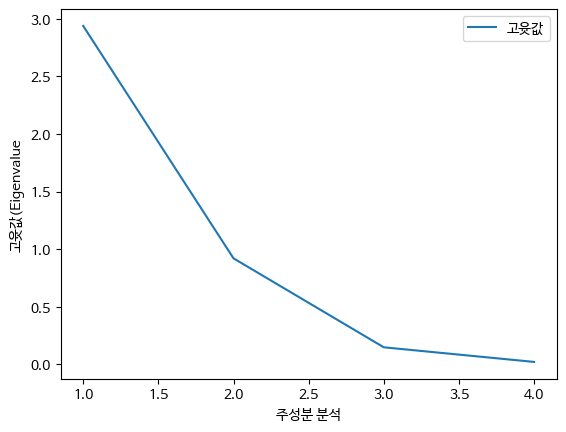

In [105]:
plt.plot(df_pca_stat["PrinNo"],df_pca_stat["EigenValues"],label="고윳값")

plt.ylabel("고윳값(Eigenvalue")
plt.xlabel("주성분 분석")
plt.legend(loc="best")

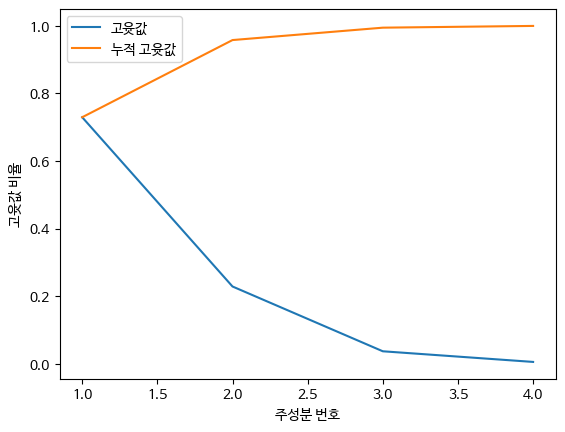

In [106]:
plt.plot(df_pca_stat["PrinNo"],
         df_pca_stat["EigenValueRatio"],label="고윳값")

plt.plot(df_pca_stat["PrinNo"],df_pca_stat["CumEigenValueRatio"],label="누적 고윳값")
plt.ylabel("고윳값 비율")
plt.xlabel("주성분 번호")
plt.legend(loc="best")

In [107]:
x_cols=pd.DataFrame({"Feature":df_raw_x.columns})

df_eigenvector=pd.concat([x_cols,pd.DataFrame(pca.components_.T*-1,\
                    columns = ["Prin1","Prin2","Prin3","Prin4"])],axis=1)
df_eigenvector.round(3)         

,Feature,Prin1,Prin2,Prin3,Prin4
0,SEPAL_LENGTH,-0.521,-0.377,0.720,0.261
1,SEPAL_WIDTH,0.269,-0.923,-0.244,-0.124
2,PETAL_LENGTH,-0.580,-0.024,-0.142,-0.801
3,PETAL_WIDTH,-0.565,-0.067,-0.634,0.524


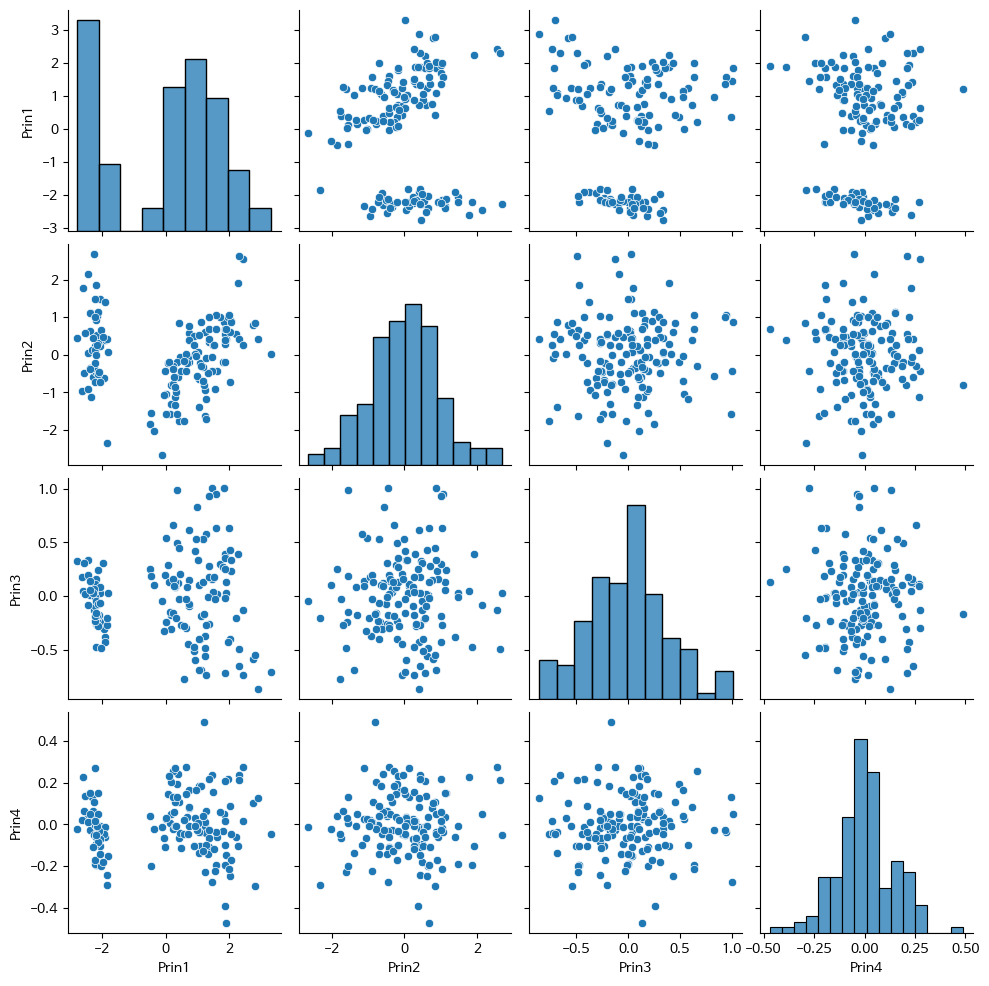

In [108]:
sns.pairplot(df_pca)

In [109]:
df_pca.corr().round(3)

,Prin1,Prin2,Prin3,Prin4
Prin1,1.0,-0.0,0.0,-0.0
Prin2,-0.0,1.0,-0.0,-0.0
Prin3,0.0,-0.0,1.0,0.0
Prin4,-0.0,-0.0,0.0,1.0


#### 시계열 분석

In [153]:
!pip install pmdarima

import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from datetime import datetime
import statsmodels.api as sm

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.3 MB/s eta 0:00:0031m22.1 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.8 MB/s eta 0:00:00m eta 0:00:010:00:01


In [154]:
df_raw=pd.read_csv("/home/piai/22기 최예진/230510/1 Big Data 분석 기초/환율.csv",parse_dates=["APPL_DATE"])
df_raw.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


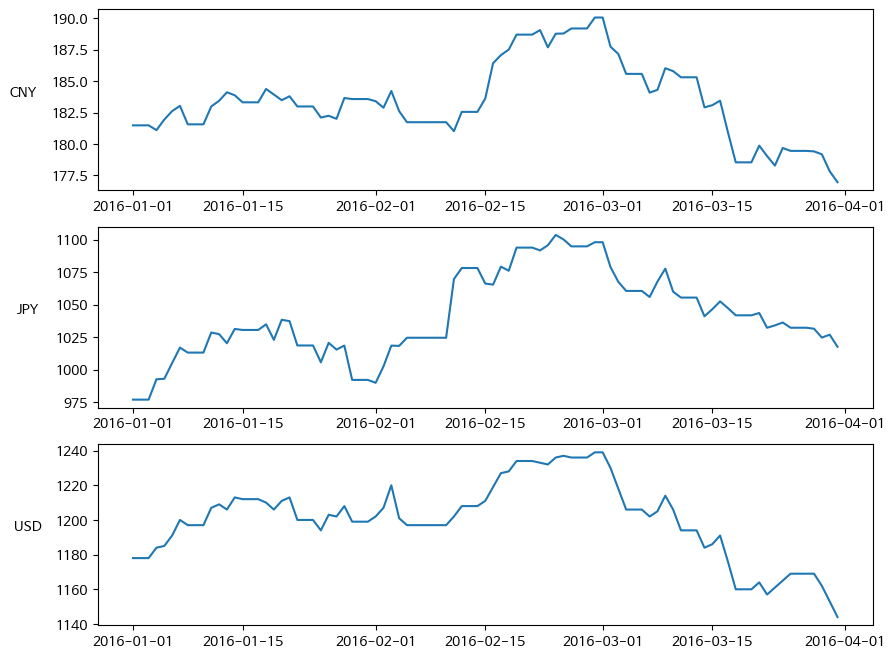

In [155]:
fig,(ax1,ax2,ax3)=plt.subplots(nrows=3,ncols=1,figsize=(10,8))

for(ax,idx,currency) in zip([ax1,ax2,ax3],[311,312,313],["CNY","JPY","USD"]):
    ax.plot("APPL_DATE","STD_RATE",data=df_raw[df_raw["CURRENCY"]==currency])
    ax.set_ylabel(currency,rotation=0,labelpad=20)

In [174]:
df_CNY=df_raw[df_raw["CURRENCY"]=='CNY'].set_index("APPL_DATE")
df_CNY.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)

df_JPY=df_raw[df_raw["CURRENCY"]=='JPY'].set_index("APPL_DATE")
df_JPY.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)

df_USD=df_raw[df_raw["CURRENCY"]=='USD'].set_index("APPL_DATE")
df_USD.drop(["CURRENCY","USD_CONV_DATE"],axis=1,inplace=True)
df_CNY.head()

,STD_RATE
APPL_DATE,
2016-01-01,181.48
2016-01-02,181.48
2016-01-03,181.48
2016-01-04,181.10
2016-01-05,181.94


In [175]:
df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [157]:
df_CNY_train=df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test=df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<Axes: xlabel='APPL_DATE'>

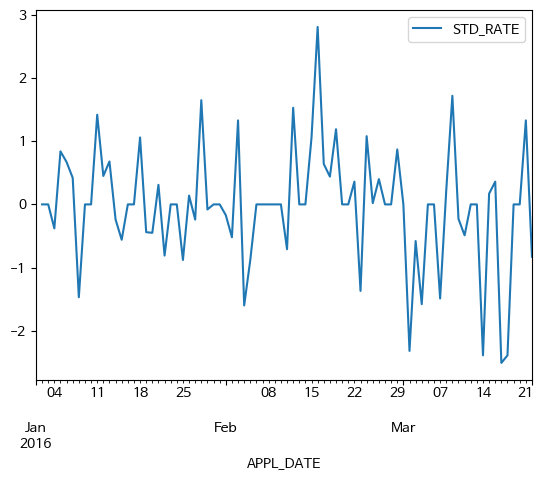

In [158]:
df_CNY_diff1=df_CNY_train-df_CNY_train.shift(1)
df_CNY_diff1.plot()

<Axes: xlabel='APPL_DATE'>

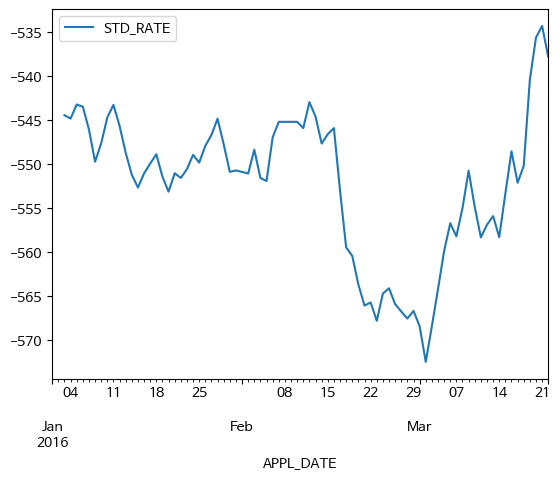

In [159]:
df_CNY_diff2=df_CNY_train-2*(df_CNY_train.shift(1)+df_CNY_train.shift(2))
df_CNY_diff2.plot()

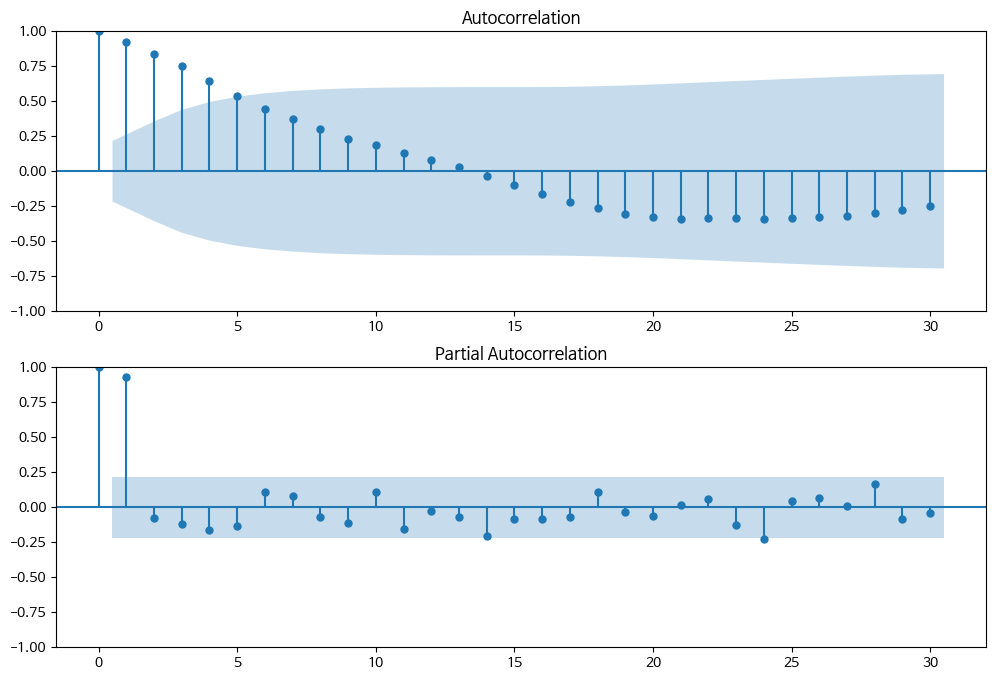

In [161]:
lag_size=30
fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)
fig=plot_acf(df_CNY_train["STD_RATE"],lags=lag_size,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_CNY_train["STD_RATE"],lags=lag_size,ax=ax2)

In [162]:
ts_model_cny=ARIMA(df_CNY_train,order=(1,2,0))

ts_result_cny=ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 17 May 2023   AIC                            251.025
Time:                        16:42:37   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

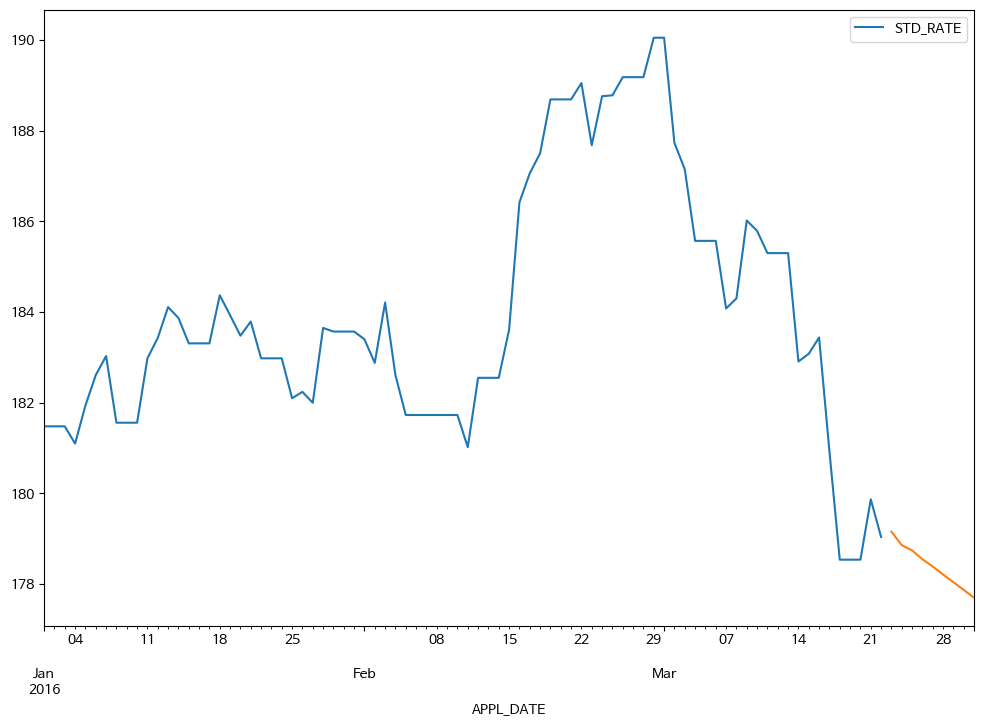

In [163]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.predict(start=start_time,end=end_time,ax=ax,plot_insample=False).plot()

In [164]:
start_time=pd.to_datetime("2016-01-03")
y_pred=ts_result_cny.predict(start=start_time,end=end_time,typ='levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886777


<Axes: xlabel='APPL_DATE'>

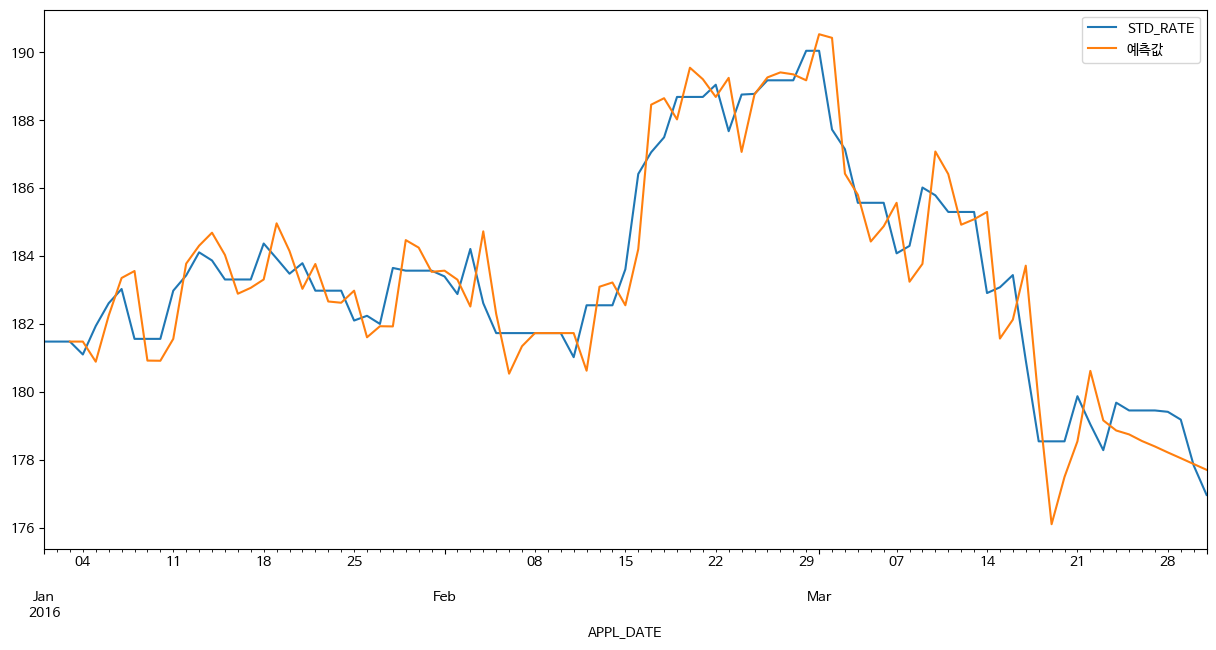

In [165]:
df_merge.plot(y=["STD_RATE","예측값"],figsize=(15,7))

In [157]:
df_CNY_train=df_CNY[df_CNY.index <= "2016-03-22"]
df_CNY_test=df_CNY[df_CNY.index > "2016-03-22"]
df_CNY_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,178.28
2016-03-24,179.68
2016-03-25,179.45
2016-03-26,179.45
2016-03-27,179.45


<Axes: xlabel='APPL_DATE'>

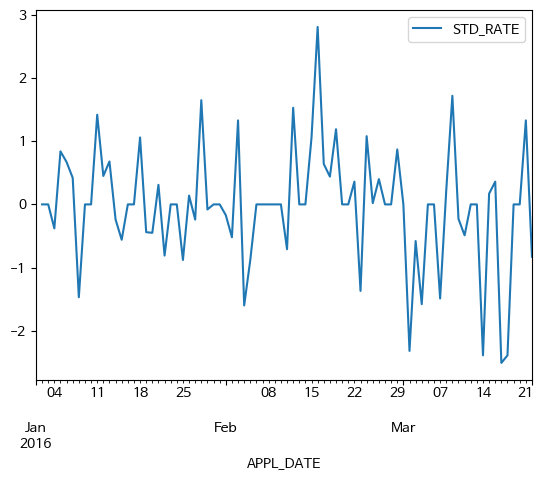

In [158]:
df_CNY_diff1=df_CNY_train-df_CNY_train.shift(1)
df_CNY_diff1.plot()

<Axes: xlabel='APPL_DATE'>

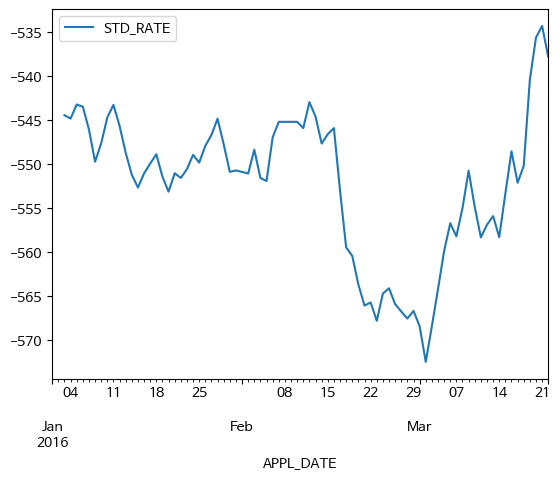

In [159]:
df_CNY_diff2=df_CNY_train-2*(df_CNY_train.shift(1)+df_CNY_train.shift(2))
df_CNY_diff2.plot()

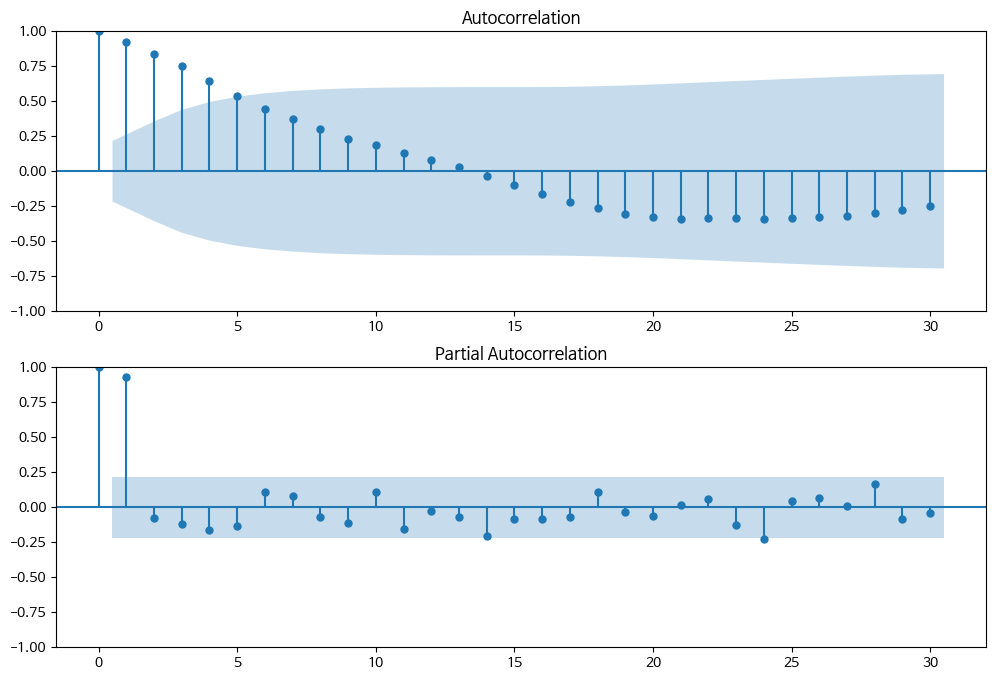

In [161]:
lag_size=30
fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)
fig=plot_acf(df_CNY_train["STD_RATE"],lags=lag_size,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_CNY_train["STD_RATE"],lags=lag_size,ax=ax2)

In [162]:
ts_model_cny=ARIMA(df_CNY_train,order=(1,2,0))

ts_result_cny=ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 17 May 2023   AIC                            251.025
Time:                        16:42:37   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

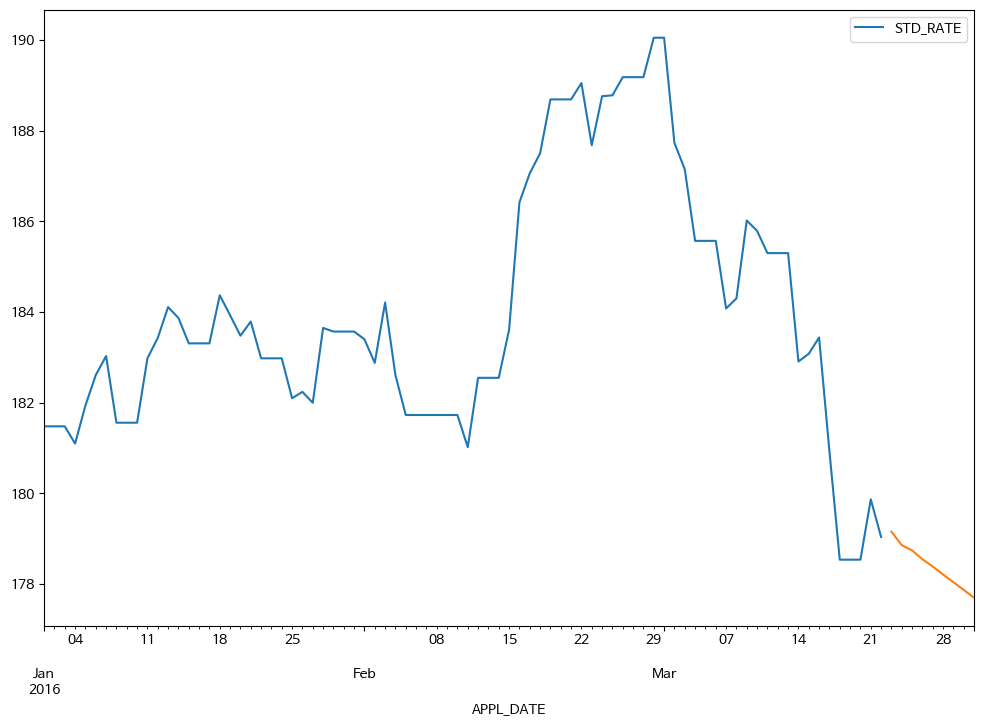

In [163]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.predict(start=start_time,end=end_time,ax=ax,plot_insample=False).plot()

In [164]:
start_time=pd.to_datetime("2016-01-03")
y_pred=ts_result_cny.predict(start=start_time,end=end_time,typ='levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886777


<Axes: xlabel='APPL_DATE'>

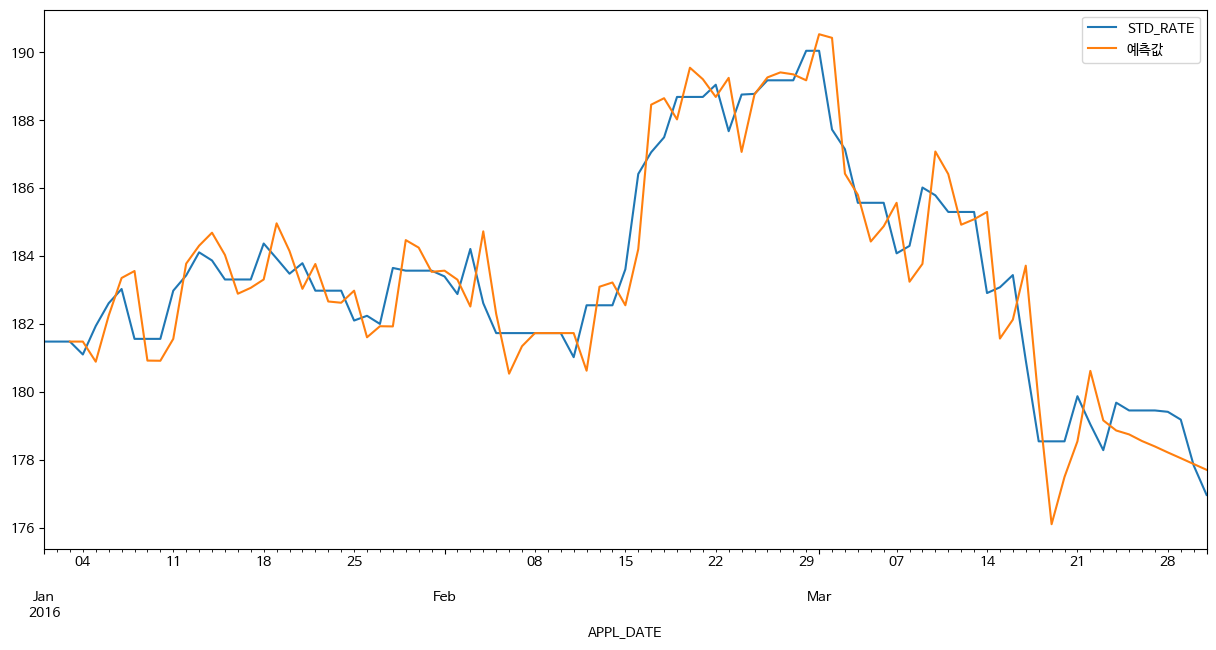

In [165]:
df_merge.plot(y=["STD_RATE","예측값"],figsize=(15,7))

In [167]:
ts_model=auto_arima(df_CNY_train,max_p=3,max_q=3,d=2,
                   trace=True,error_action='ignore')

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=228.840, Time=0.11 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=265.705, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=251.025, Time=0.02 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=223.626, Time=0.03 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=225.299, Time=0.04 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=225.249, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=226.997, Time=0.07 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,2,1)(0,0,0)[0]          
Total fit time: 0.414 seconds


In [168]:
ts_model_cny=ARIMA(df_CNY_train,order=(1,2,0))
ts_result_cny=ts_model_cny.fit()
print(ts_result_cny.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -123.513
Date:                Wed, 17 May 2023   AIC                            251.025
Time:                        16:51:27   BIC                            255.790
Sample:                    01-01-2016   HQIC                           252.936
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4389      0.106     -4.146      0.000      -0.646      -0.231
sigma2         1.2805      0.213      6.014      0.000       0.863       1.698
Ljung-Box (L1) (Q):                   2.62   Jarque-

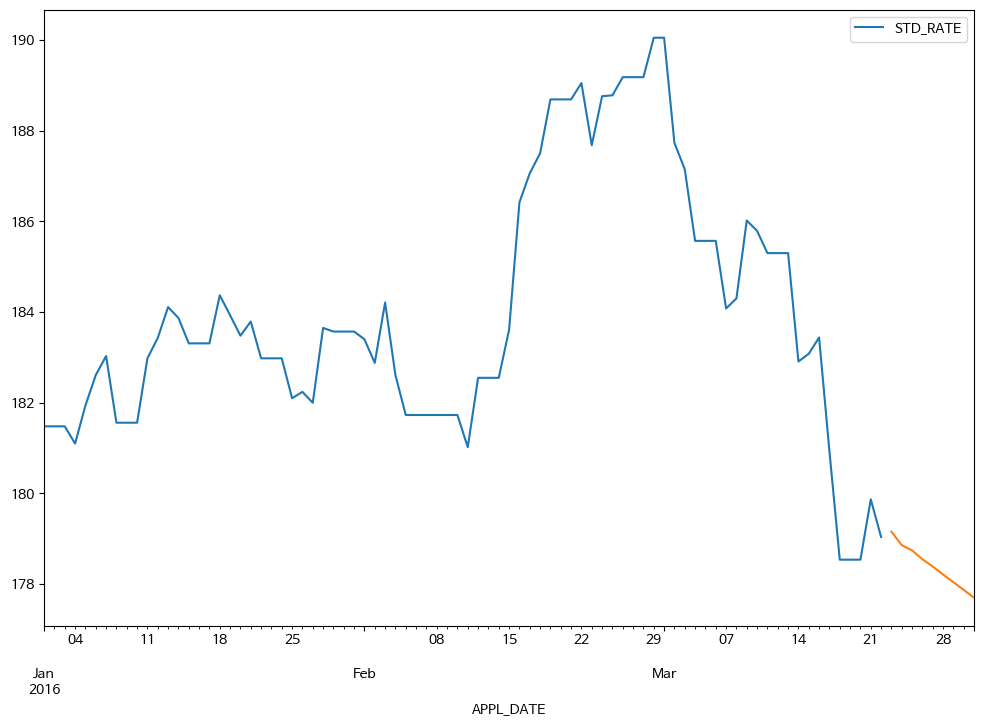

In [169]:
start_time=df_CNY_test.index.min()
end_time=df_CNY_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_CNY_train.plot(ax=ax)
fig=ts_result_cny.predict(start=start_time,end=end_time,ax=ax,plot_insample=False).plot()

In [170]:
start_time=pd.to_datetime("2016-01-03")
y_pred=ts_result_cny.predict(start=start_time,end=end_time,typ='levels')
df_merge=df_CNY
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,181.48,NaN
2016-01-02,181.48,NaN
2016-01-03,181.48,181.480126
2016-01-04,181.10,181.480000
2016-01-05,181.94,180.886777


<Axes: xlabel='APPL_DATE'>

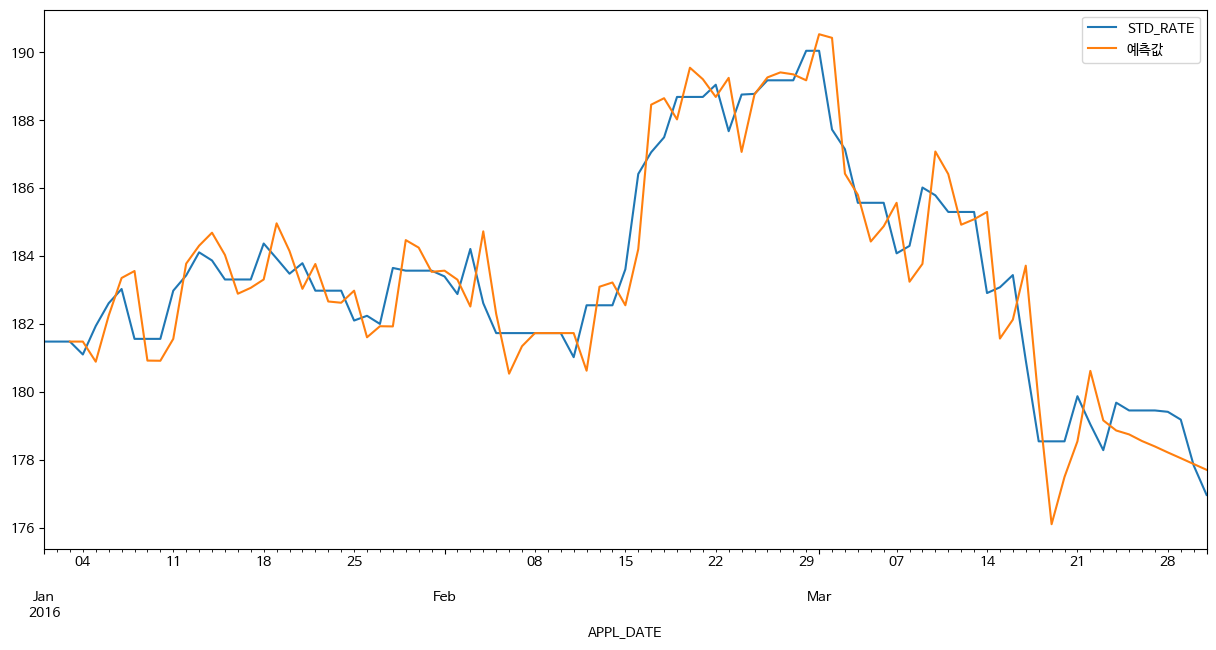

In [171]:
df_merge.plot(y=["STD_RATE","예측값"],figsize=(15,7))

#### 실습

In [176]:
df_USD.head()

,STD_RATE
APPL_DATE,
2016-01-01,1178.0
2016-01-02,1178.0
2016-01-03,1178.0
2016-01-04,1184.0
2016-01-05,1185.0


In [177]:
df_USD_train=df_USD[df_USD.index <= "2016-03-22"]
df_USD_test=df_USD[df_USD.index > "2016-03-22"]
df_USD_test.head()

,STD_RATE
APPL_DATE,
2016-03-23,1161.0
2016-03-24,1165.0
2016-03-25,1169.0
2016-03-26,1169.0
2016-03-27,1169.0


<Axes: xlabel='APPL_DATE'>

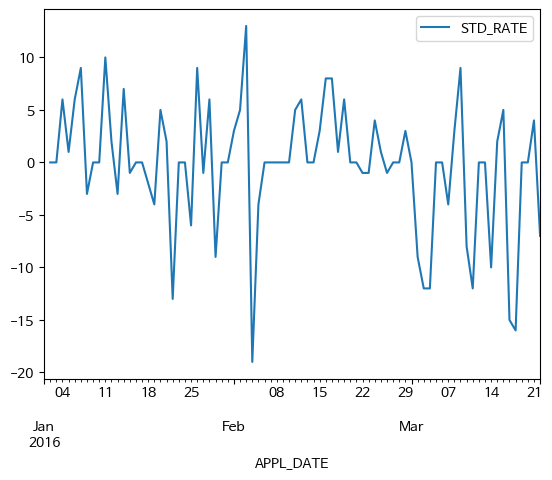

In [178]:
df_USD_diff1=df_USD_train-df_USD_train.shift(1)
df_USD_diff1.plot()

<Axes: xlabel='APPL_DATE'>

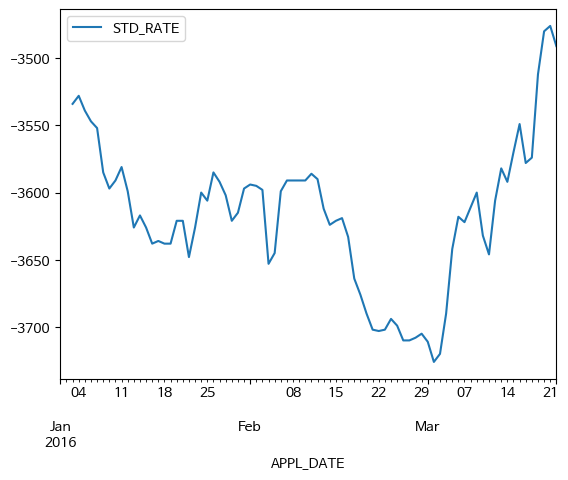

In [179]:
df_USD_diff2=df_USD_train-2*(df_USD_train.shift(1)+df_USD_train.shift(2))
df_USD_diff2.plot()

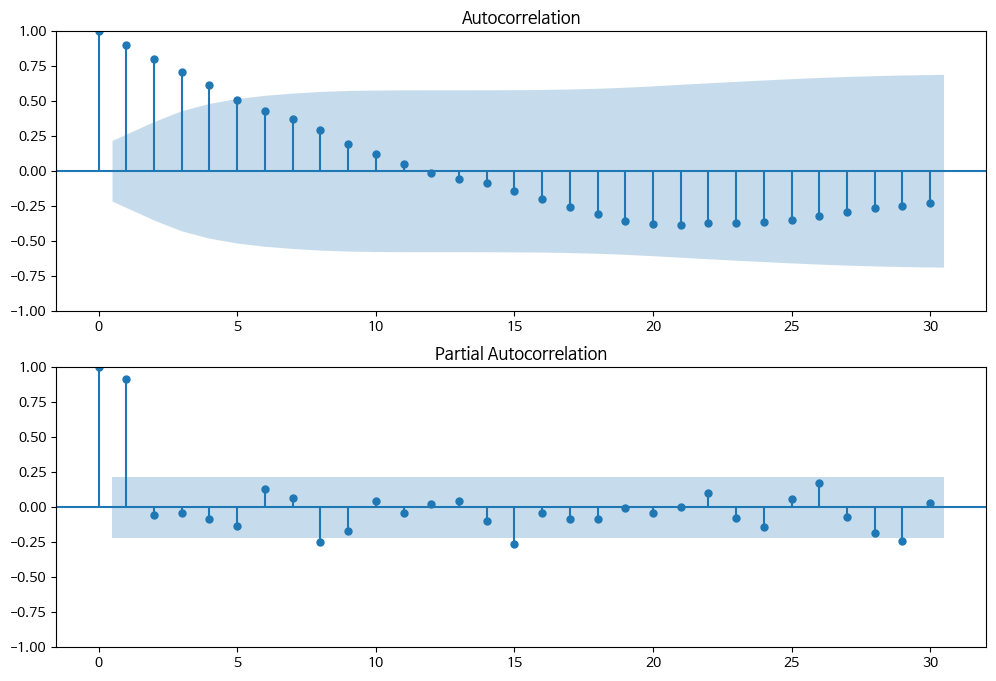

In [180]:
lag_size=30
fig=plt.figure(figsize=(12,8))

ax1=fig.add_subplot(211)
fig=plot_acf(df_USD_train["STD_RATE"],lags=lag_size,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_USD_train["STD_RATE"],lags=lag_size,ax=ax2)

In [181]:
ts_model_usd=ARIMA(df_USD_train,order=(1,2,0))

ts_result_usd=ts_model_usd.fit()
print(ts_result_usd.summary())

                               SARIMAX Results                                
Dep. Variable:               STD_RATE   No. Observations:                   82
Model:                 ARIMA(1, 2, 0)   Log Likelihood                -274.804
Date:                Wed, 17 May 2023   AIC                            553.608
Time:                        17:02:15   BIC                            558.372
Sample:                    01-01-2016   HQIC                           555.518
                         - 03-22-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3764      0.124     -3.047      0.002      -0.618      -0.134
sigma2        56.2767      7.107      7.919      0.000      42.348      70.206
Ljung-Box (L1) (Q):                   2.21   Jarque-

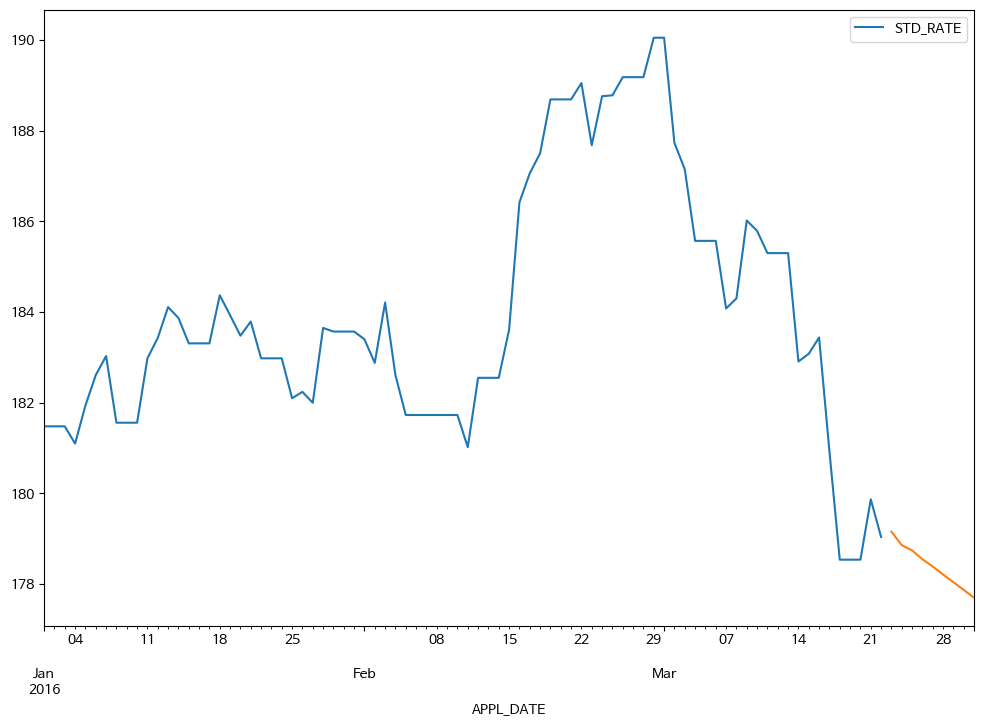

In [163]:
start_time=df_USD_test.index.min()
end_time=df_USD_test.index.max()
fig,ax=plt.subplots(figsize=(12,8))

ax=df_USD_train.plot(ax=ax)
fig=ts_result_usd.predi
ct(start=start_time,end=end_time,ax=ax,plot_insample=False).plot()

In [182]:
start_time=pd.to_datetime("2016-01-03")
y_pred=ts_result_usd.predict(start=start_time,end=end_time,typ='levels')
df_merge=df_USD
df_merge["예측값"]=y_pred
df_merge.head()

,STD_RATE,예측값
APPL_DATE,,
2016-01-01,1178.0,NaN
2016-01-02,1178.0,NaN
2016-01-03,1178.0,1178.029066
2016-01-04,1184.0,1178.000000
2016-01-05,1185.0,1187.741796


<Axes: xlabel='APPL_DATE'>

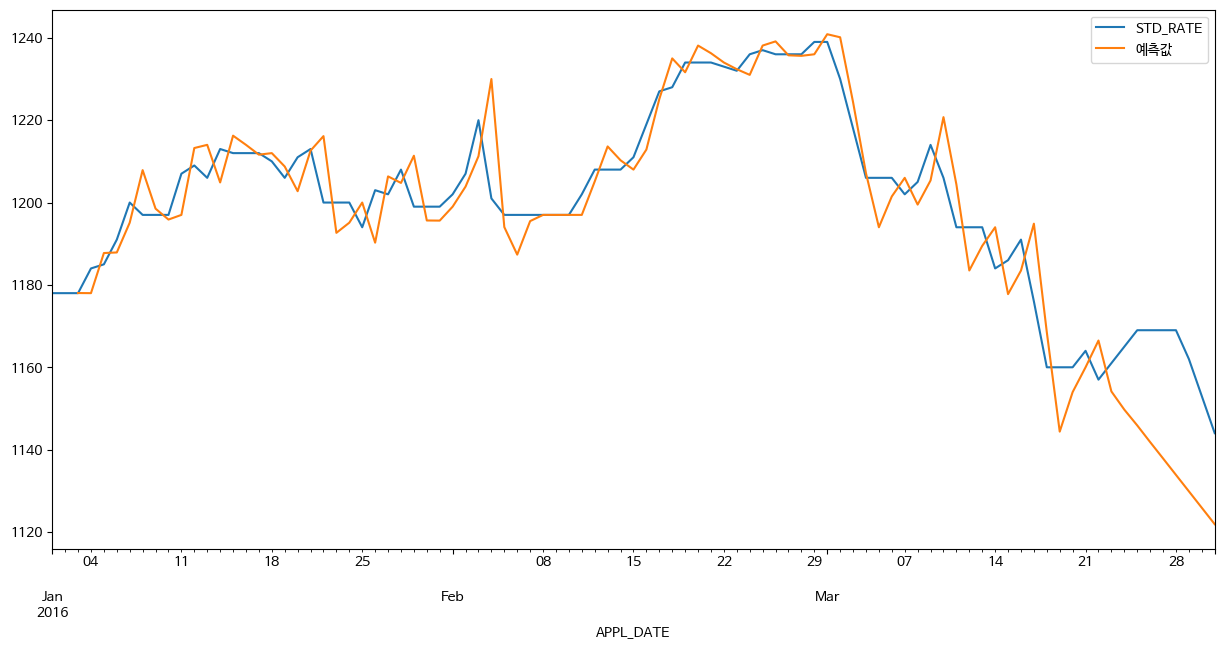

In [183]:
df_merge.plot(y=["STD_RATE","예측값"],figsize=(15,7))